In [1]:
conda install -c conda-forge pygam


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lofori\AppData\Local\anaconda3\ANACONDA

  added / updated specs:
    - pygam


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       h56e8100_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    openssl-1.1.1w             |       h2bbff1b_0         5.5 MB
    progressbar2-4.4.2         |     pyhd8ed1ab_0          53 KB  conda-forge
    pygam-0.9.1                |     pyhd8ed1ab_0         439 KB  conda-forge
    python-utils-3.8.2         |     pyhd8ed1ab_0          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.3 MB

The following NEW packages will be INSTALLED:

  progressbar2       conda-forge/noarch::progress



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.4.0




In [5]:
from pygam.datasets import wage

#load the dataset
tmp_x, y= wage(return_X_y=True)

#Assuming X is a pandas Dataframe or can be converted into one(for easier viewing)
import pandas as pd

#Convert to Dataframe if necessary(this step depends on how pygam returns the dataset)
if not isinstance(tmp_x, pd.DataFrame):
    X = pd.DataFrame(tmp_x)

print(X.head())

        0     1    2
0  2006.0  18.0  0.0
1  2004.0  24.0  3.0
2  2003.0  45.0  2.0
3  2003.0  43.0  3.0
4  2005.0  50.0  1.0


[ 75.04315402  70.47601965 130.98217738 ...  66.22940829  87.98103279
  90.48191336]


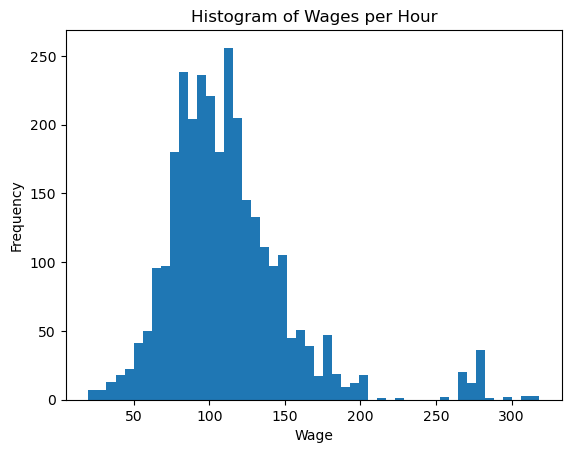

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# # Parameters
# mu = 10 # Average number of customers per hour
# n_hours = 1000 # Number of hours to simulate

# # Simulate arrivals using the Poisson distribution
# # customer_arrivals = np.random.poisson(mu, n_hours)
print(y)

# Plotting
plt.hist(y,bins=50)
plt.title('Histogram of Wages per Hour')
plt.xlabel('Wage')
plt.ylabel('Frequency')
#plt
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

df=pd.read_csv("C:\\Users\\lofori\\Desktop\\train.csv")
print(len(df))
print(df)

X=df.loc[:,["percent_atom_al","percent_atom_ga","percent_atom_in","formation_energy_ev_natom"]]
print(X)

y=df["bandgap_energy_ev"]

2400
        id  spacegroup  number_of_total_atoms  percent_atom_al  \
0        1          33                     80           0.6250   
1        2         194                     80           0.6250   
2        3         227                     40           0.8125   
3        4         167                     30           0.7500   
4        5         194                     80           0.0000   
...    ...         ...                    ...              ...   
2395  2396          33                     40           0.7500   
2396  2397         167                     30           0.4167   
2397  2398         206                     80           0.4375   
2398  2399          33                     80           0.3125   
2399  2400         206                     80           0.8750   

      percent_atom_ga  percent_atom_in  lattice_vector_1_ang  \
0              0.3750           0.0000                9.9523   
1              0.3750           0.0000                6.1840   
2         

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)

[-64.94888833 -67.29178801 -68.34303069  -4.49330987]
69.62987572328511


In [13]:
y_prediction=reg.predict(X_test)

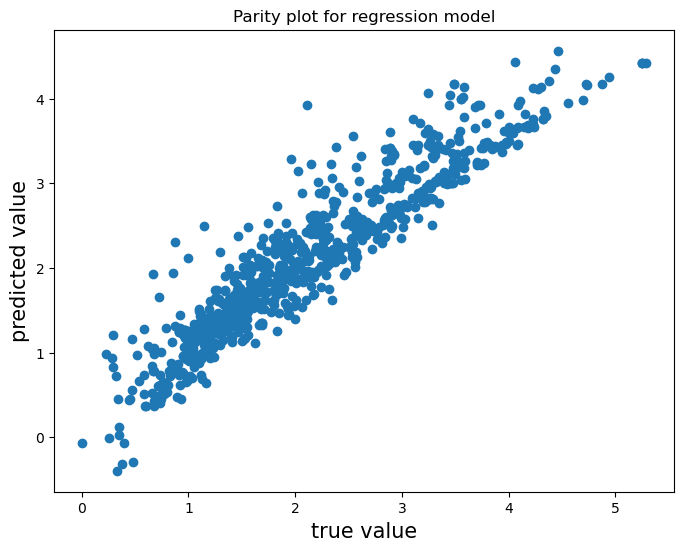

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_prediction)
plt.xlabel('true value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title('Parity plot for regression model')
plt.show()

In [15]:
error = []
for i, j in zip(y_prediction, y_test):
    error.append(np.abs(i-j))
    
    
print(len(error))
np.sum(error)/len(error)
    
    

792


0.28509761411818185

In [16]:
total_error = 0
error = []
for i, j in zip(y_prediction, y_test):
    total_error += np.abs(i-j)
    error.append(np.abs(i-j))
    
    
print(len(error))
np.sum(error)/len(error)
total_error / len(y_prediction)

792


0.2850976141181817

In [34]:
import numpy as np

total_error = 0
error = []
N = len(y_prediction)

for i, j in zip(y_prediction, y_test):
    squared_diff = np.square(np.abs(i - j))
    total_error += np.sqrt(1/N * np.sum(squared_diff))
    error.append(np.sqrt(1/N * np.sum(squared_diff)))

print(len(error))
print(np.sum(error) / len(error))
print(total_error / len(y_prediction))


792
0.010130502593545296
0.010130502593545292


In [39]:
total_error = 0
error = []
N = len(y_prediction)

for i, j in zip(y_prediction, y_test):
    squared_diff = np.square(np.abs(i - j))
    total_error += np.sqrt(1/N * np.sum(squared_diff))
    error.append(np.sqrt(1/N * np.sum(squared_diff)))
    

print(len(error))
np.sum(error)/len(error)
total_error / len(y_prediction)    
    
    

792


0.010130502593545292

In [50]:
import pygam
from pygam import LinearGAM, s

In [53]:
gam = LinearGAM(s(0) + s(1) + s(2) + s(3))
#gam = LinearGAM(s(0) + s(1) +s(2) + s(3).fit(X_train,y_train))

In [57]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeavePOut, LeaveOneOut

In [59]:
rf = RandomForestRegressor(n_estimators=30, max_depth=None, bootstrap=True)

In [60]:
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [63]:
def calc_rmse(y1, y2):

    for i, j in zip(y_prediction, y_test):
        squared_diff = np.square(np.abs(i - j))
        total_error += np.sqrt(1/N * np.sum(squared_diff))
        error.append(np.sqrt(1/N * np.sum(squared_diff)))

    print(len(error))
    np.sum(error)/len(error)
    total_error / len(y_prediction) 
    return np.sqrt(err)

In [71]:
def calc_mae(y1, y2):
    total_error = 0
    error = [] 
    for i, j in zip(y1, y2):
        total_error += np.abs(i-j)
        error.append(np.abs(i-j))
    
    
    print(len(error))
    return np.sum(error)/len(error)


In [72]:
rf = rf = RandomForestRegressor(n_estimators=30, max_depth=None, bootstrap=True)
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("train set MAE", calc_mae(y_train, y_pred_train))
print("test set MAE", calc_mae(y_test, y_pred_test))

1608
train set MAE 0.0695421858140305
792
test set MAE 0.18970411058501688
